In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
S0 = 100      # Initial stock price
K = 100       # Strike price
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
T = 1.0       # Maturity in years
N = 100000    # Number of simulations

In [3]:
Z = np.random.normal(0, 1, N)
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

In [4]:
discounted_ST = np.exp(-r * T) * ST
expected_discounted_ST = np.mean(discounted_ST)

print(f"Expected discounted S_T: {expected_discounted_ST:.4f}")
print(f"Initial S0: {S0}")

Expected discounted S_T: 100.0718
Initial S0: 100


In [5]:
payoff = np.maximum(ST - K, 0)
call_price = np.exp(-r * T) * np.mean(payoff)

print(f"Call Option Price (Martingale method): {call_price:.4f}")

Call Option Price (Martingale method): 10.4982


In [6]:
def bs_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

bs_price = bs_call_price(S0, K, T, r, sigma)

print(f"Black-Scholes Price: {bs_price:.4f}")

Black-Scholes Price: 10.4506


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Vatsh Van\AppData\Local\Temp\ipykernel_40760\3199678457.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Simulated $S_T$ under $\mathbb{Q}$", fontsize=14, weight='bold')


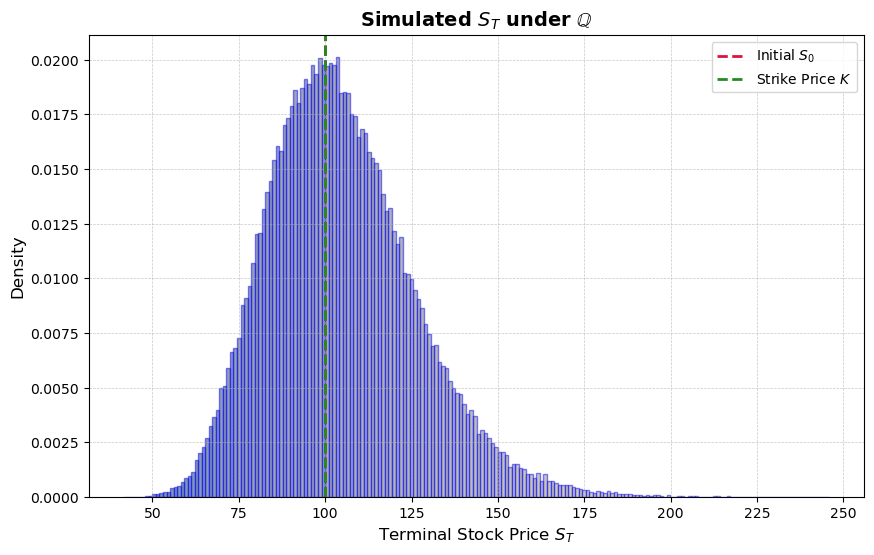

In [19]:
counts, bins = np.histogram(ST, bins=200, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Use a perceptually uniform and visually pleasing colormap
colors = plt.cm.cividis((bin_centers - bin_centers.min()) / (bin_centers.max() - bin_centers.min()))

plt.figure(figsize=(10, 6))
for left, height, width, color in zip(bins[:-1], counts, np.diff(bins), colors):
    plt.bar(left, height, width=width, color=color, edgecolor='blue', alpha=0.5)

plt.title("Simulated $S_T$ under $\mathbb{Q}$", fontsize=14, weight='bold')
plt.xlabel("Terminal Stock Price $S_T$", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.axvline(x=S0, color='crimson', linestyle='--', linewidth=2, label='Initial $S_0$')
plt.axvline(x=K, color='forestgreen', linestyle='--', linewidth=2, label='Strike Price $K$')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.savefig("simulated_ST_distribution.png")
plt.show()

### ✅ Summary

- Simulated $$S_T \sim \text{Lognormal}$$ under $$\mathbb{Q}$$
- Verified: $$\mathbb{E}^\mathbb{Q}[e^{-rT} S_T] = S_0$$
- Option price estimated via expectation:
  $$C_0 = \mathbb{E}^\mathbb{Q}[e^{-rT} (S_T - K)^+]$$
- Matches Black-Scholes formula, confirming the martingale pricing framework

Martingales simplify pricing without solving PDEs directly.